In [195]:
X=np.array([i for i in range(1000)],dtype=np.float32)
X=X.reshape((1000,1))
Y=np.array([1 if i%2!=0 else 0 for i in X])
Y=Y.reshape((1000,1))
Y.shape

(1000, 1)

In [202]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization,Input
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
#X=[i+np.random() for i in range(10)]
# create model

model = Sequential()
n=10
depth=1
def denseblock(i):
    model.add(Dense(i, activation='relu',))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
#model.add(BatchNormalization(input_shape=(X.shape[1],)))
model.add(Dense(1,activation='linear',input_dim=(X.shape[1])))
for i in range(depth):
    denseblock(n)
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
stop=EarlyStopping(patience=1000)
model.optimizer.lr=1e-4
model.fit(X, Y, nb_epoch=1,validation_split=0.2, batch_size=64,  verbose=0)
model.optimizer.lr=1e-3
model.fit(X, Y, nb_epoch=2,validation_split=0.2, batch_size=64,  verbose=0)
model.optimizer.lr=1e-4
history=model.fit(X, Y, nb_epoch=100,validation_split=0.8,shuffle=True, batch_size=64,  verbose=0,callbacks=[stop])

# calculate predictions
predictions = model.predict(X)
# round predictions
model.evaluate(X,Y)

  32/1000 [..............................] - ETA: 0s

[0.91407471656799322, 0.5]

In [194]:
model.predict(np.array([1]))

array([[ 0.60468072]], dtype=float32)

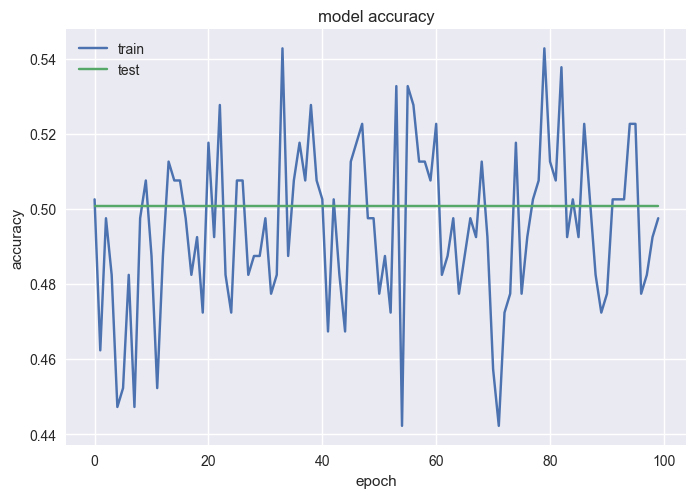

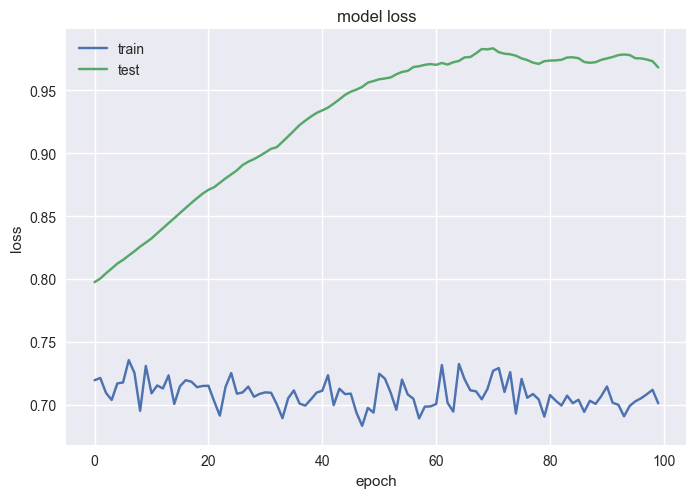

In [203]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()